<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_05_ABC_Modelo_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Problema:

El dataset de casas de California. Es un conjunto de datos que contiene información sobre los precios medios de las viviendas y otras características de los distritos de California, basado en el censo de 1990.


**longitude**: es la longitud del centroide del distrito, expresada en grados. Esta variable indica la posición geográfica del distrito en el mapa.


**latitude**: es la latitud del centroide del distrito, expresada en grados. Esta variable también indica la posición geográfica del distrito en el mapa.

**housing_median_age**: es la edad media de las casas en el distrito, expresada en años. Esta variable refleja el estado y la antigüedad de las viviendas en el distrito.

**total_rooms**: es el número total de habitaciones en el distrito, sin distinguir entre tipos de habitaciones. Esta variable refleja el tamaño y la capacidad de las viviendas en el distrito.

**total_bedrooms**: es el número total de dormitorios en el distrito. Esta variable refleja el número de espacios destinados al descanso en las viviendas del distrito.

**population**: es el número de personas que viven en el distrito. Esta variable refleja la densidad y la demanda de vivienda en el distrito.


**households**: es el número de hogares en el distrito. Un hogar es un grupo de personas que residen dentro de una casa. Esta variable refleja la estructura y la composición de las familias en el distrito.


**median_income**: Es el ingreso medio por hogar en el distrito, expresado en miles de dólares ($1000). Esta variable refleja el nivel socioeconómico y el poder adquisitivo de los habitantes del distrito.


**median_house_value**: Es el valor medio de las casas en el distrito, expresado en cientos de miles de dólares ($100,000). Esta variable es la variable objetivo que se quiere predecir. Refleja el precio y la calidad de las viviendas en el distrito.


# 1.0 Analisis del data frame


1. Leer el DataFrame housing csv https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv

2. Entender  el estado de los datos, para ello puedo emplear los comandos básicos del pandas

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```


In [ ]:
path = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv"
df = pd.read_csv(path)
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# Primera visión de los datos
print("=================== INFORMACIÓN DE LOS DATOS ===================")
df.info()

print("\n=========== VALORES NULOS O NA ===========")
df.isna().sum()

=================== INFORMACIÓN DE LOS DATOS ===================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

=========== VALORES NULOS O NA ===========


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


3. Determinar las columnas únicas asociadas a columna ocean_proximity.

In [ ]:
ocean_proximity_unique = df["ocean_proximity"].unique()
print(ocean_proximity_unique)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value","ocean_proximity"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.


In [ ]:
df.groupby(["ocean_proximity"]).mean()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.847766,34.560577,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,-119.732990,36.731829,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,-122.260694,37.801057,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,-119.332555,34.738439,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

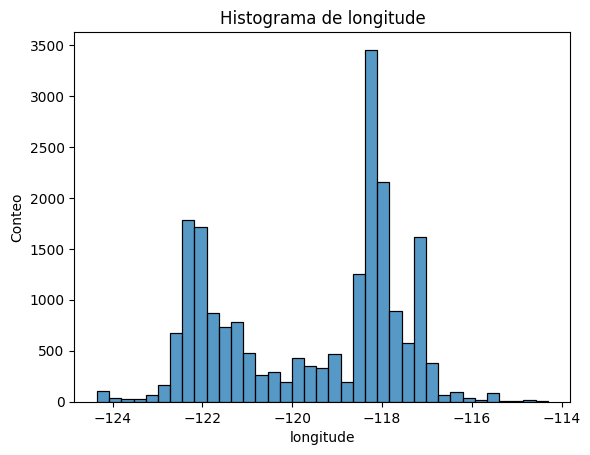

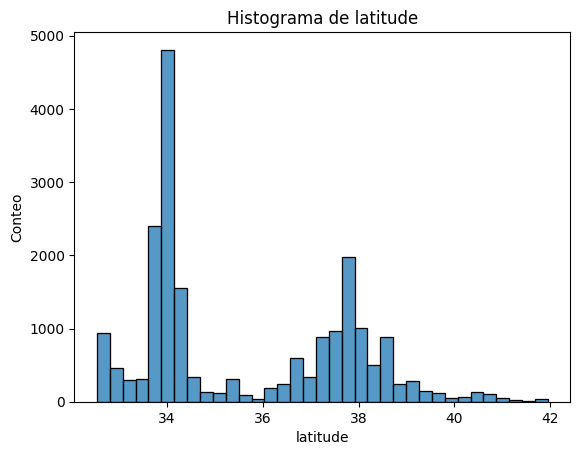

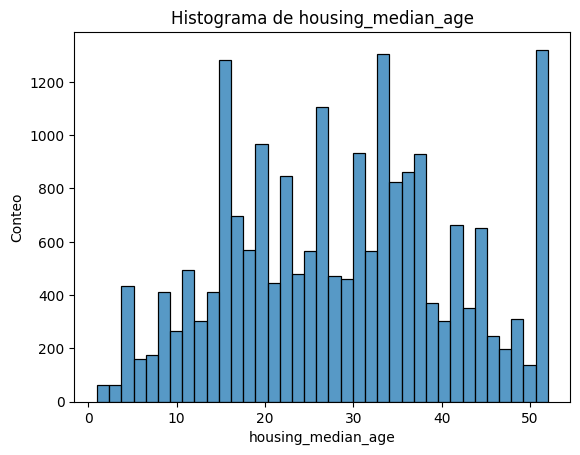

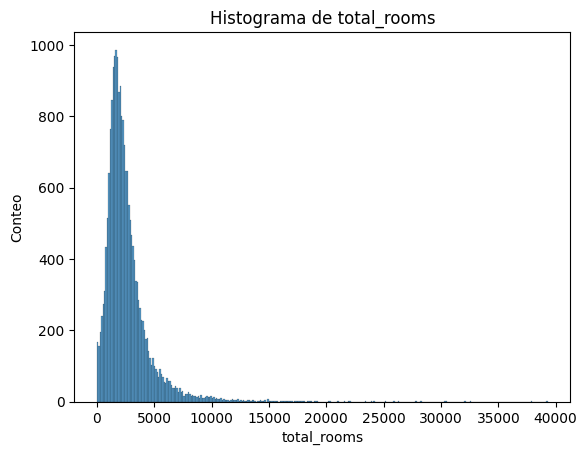

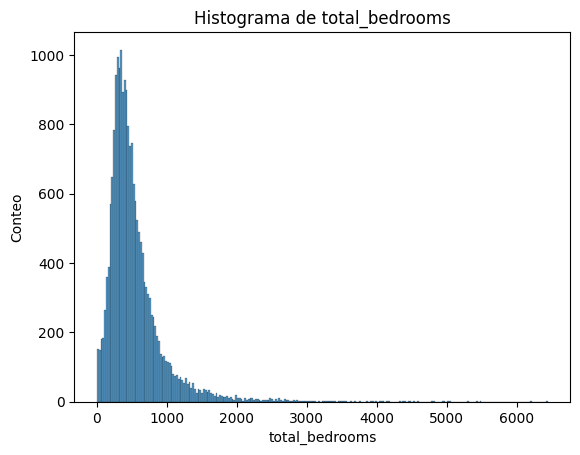

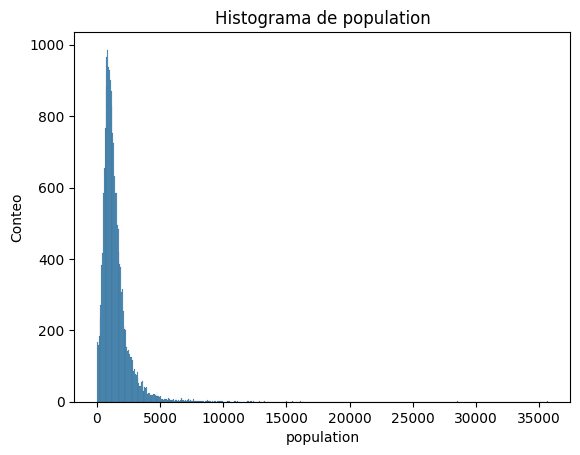

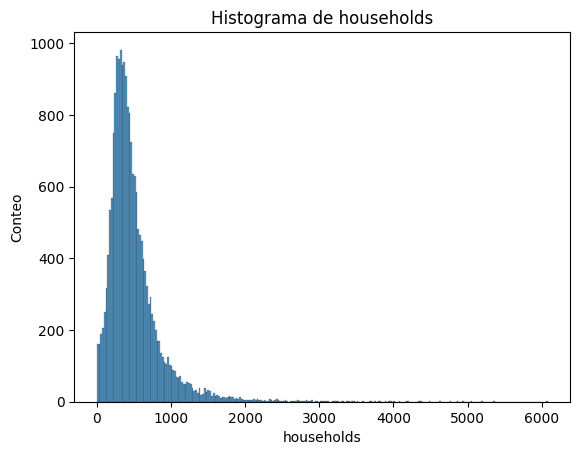

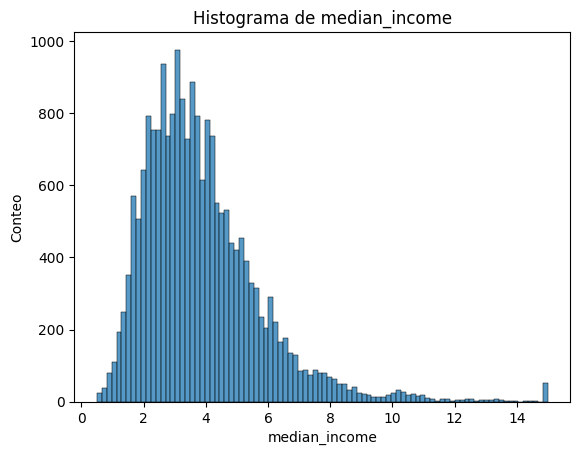

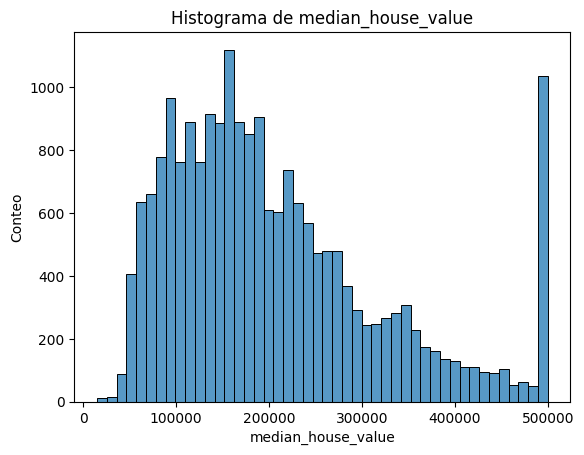

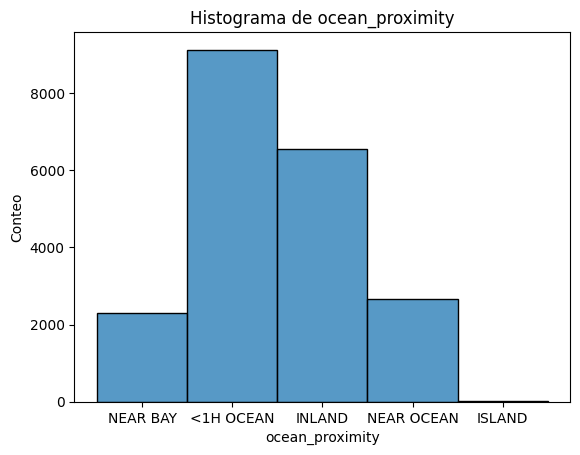

In [ ]:
for column in df.columns:
    sns.histplot(df[column])  # Crear el histograma
    plt.title(f'Histograma de {column}')  # Título con el nombre de la columna
    plt.xlabel(column)    # Etiqueta del eje X
    plt.ylabel('Conteo')  # Etiqueta del eje Y
    plt.show()

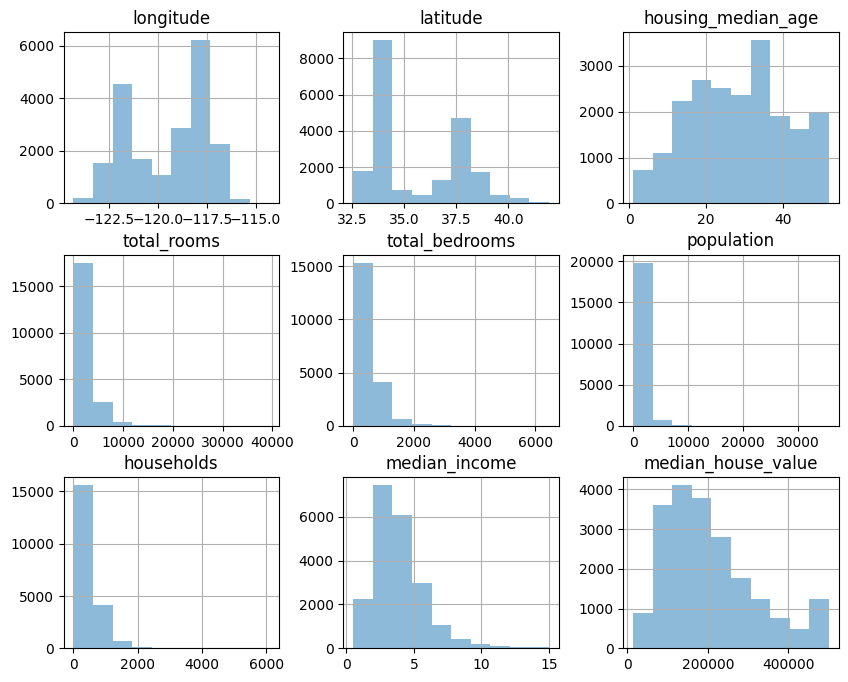

In [ ]:
# En un solo diagrama
axs = df.hist(alpha=0.5, figsize=(10,8))

### [Diagrama de caja](https://en.wikipedia.org/wiki/Box_plot)


### Diagrama de caja

![box](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)



### Interpretación de un diagrama de caja

- Desde el mínimo al valor más bajo de la caja: primer cuartil, 25% de los datos.

- Desde el valor más bajo de la caja hasta la mediana: segundo cuartil, 25% de los datos.

- Desde la mediana hasta el valor mas alto de la caja : tercer cuartil, 25% de los datos.

- Desde el valor más alto de la caja hasta el máximo: Cuarto  cuartil, 25% de los datos


El **rango intercuartil** $IQR = Q_3-Q_1$ permite definir qué datos pueden ser atípicos, basado en los siguientes limites:

$Max = Q_3 + 1.5 \ IQR$

$Min = Q_1 - 1.5 \ IQR$

\
El cuartil puede ser determinado como sigue:

Para calcular los cuartiles de una lista de números:

1. Ordenar los números de menor a mayor.

2. Calcular la posición de cada cuartil usando la fórmula: $Q = a (N+1) / 4$, donde $Q$ es la posición del cuartil, $a$ es el número del cuartil (1, 2 o 3), y $N$ es el número total de datos.

- Si la posición del cuartil es un número entero, el valor del cuartil es el dato que está en esa posición.

- Si la posición del cuartil es un número decimal, el valor del cuartil se interpola usando la fórmula: $Q_v = x + d (y - x)$, donde $Q_v$ es el valor del cuartil, $x$ es el dato anterior a la posición del cuartil, $y$ es el dato posterior a la posición del cuartil, y $d$ es la parte decimal de la posición del cuartil.



### Veamos un ejemplo de boxplot:

In [ ]:
T = np.array([52, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 89])

Tsort = np.sort(T)    # Ordenamos de menor a mayor

print('Cantidad de datos:', len(T))
print(f"Datos ordenados: {Tsort}")
len(T)/4

Cantidad de datos: 24
Datos ordenados: [52 57 57 58 63 66 66 67 67 68 69 70 70 70 70 72 73 75 75 76 76 78 79 89]


6.0

In [ ]:
# Contar las posiciones
N = len(T)
pos_q = [ a*(N+1)/4 for a in [1,2,3] ]
print(pos_q)

[6.25, 12.5, 18.75]


In [ ]:
df_T = pd.DataFrame(T)

# Información de los datos
df_T.info()
df_T.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       24 non-null     int64
dtypes: int64(1)
memory usage: 324.0 bytes


,0
count,24.000000
mean,69.291667
std,8.179929
min,52.000000
25%,66.000000
50%,70.000000
75%,75.000000
max,89.000000


Rango de datos significativos: [np.float64(52.5), np.float64(88.5)] 



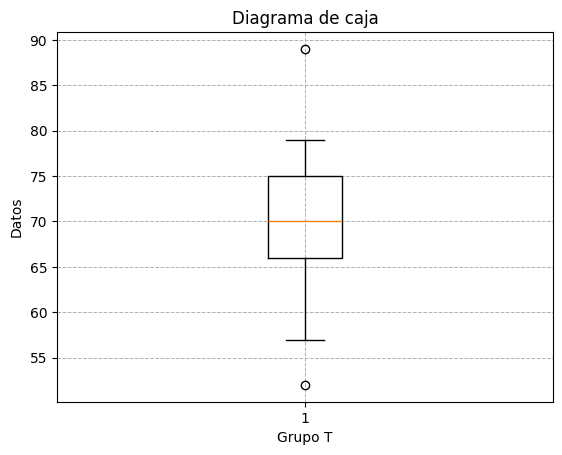

In [ ]:
# Cuartiles
Q1 = np.percentile(T, 25)   # Primer cuartil
Q2 = np.percentile(T, 50)   #
Q3 = np.percentile(T, 75)

IQR = Q3-Q1     # Rango intercuartil
max_ = Q3 + 1.5*IQR     # Extremos de los datos no atípicos
min_ = Q1 - 1.5*IQR

print('Rango de datos significativos:', [min_, max_], '\n')

plt.title('Diagrama de caja')
# axs = df_T.boxplot()     # También posible graficar con pandas
plt.boxplot(T)
plt.xlabel('Grupo T')
plt.ylabel('Datos')
plt.grid(True, linestyle='--', linewidth=0.7)  # Cuadrícula con estilo
plt.show()

### Continuando con el dataset

7. Empleando el siguiente código realiza el gráfico boxplot,
```python
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for Comparing price per living space for each city')
plt.show()
```

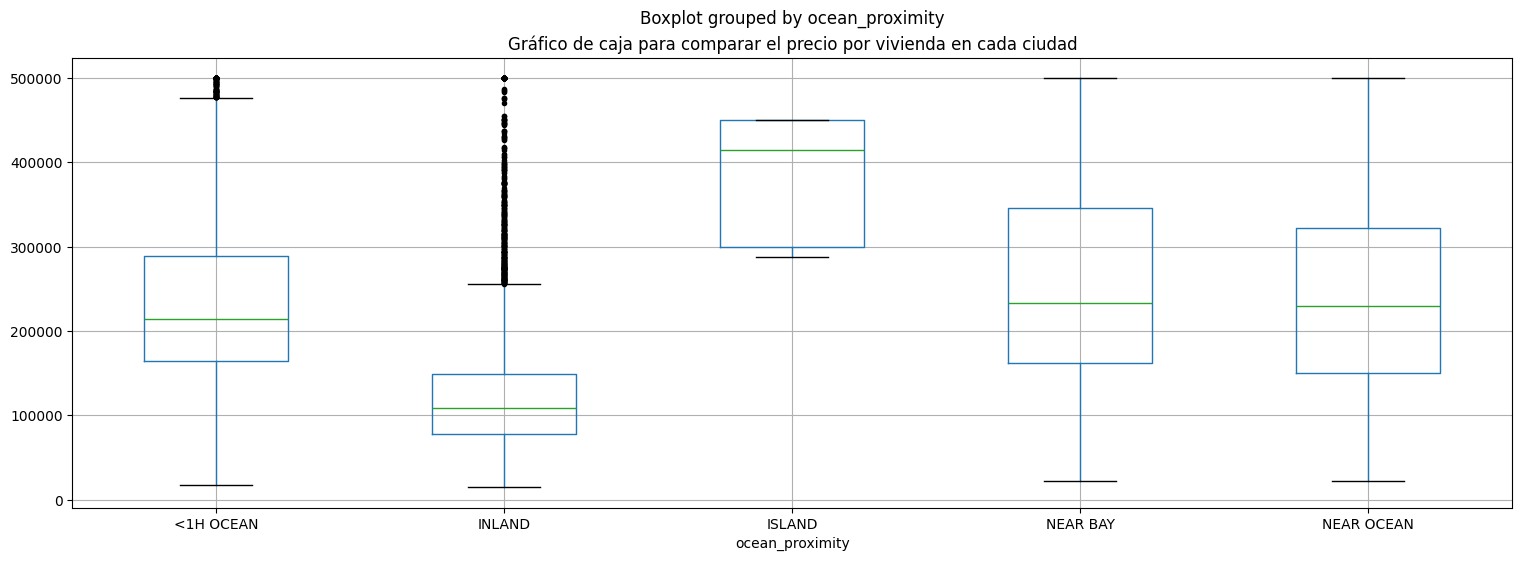

In [ ]:
# Variable objetivo: median_house_value
df.boxplot(column="median_house_value", by='ocean_proximity', sym='k.', figsize=(18,6))   # boxplot agrupado por ocean_proximity
plt.title('Gráfico de caja para comparar el precio por vivienda en cada ciudad')
plt.show()

8. Determina la matrix de correlación.

### [Matriz de correlación](https://en.wikipedia.org/wiki/Correlation)

¿Como se determina la matrix de correlación?

![Matrix de correlación](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)



```python
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True)
plt.show()
```

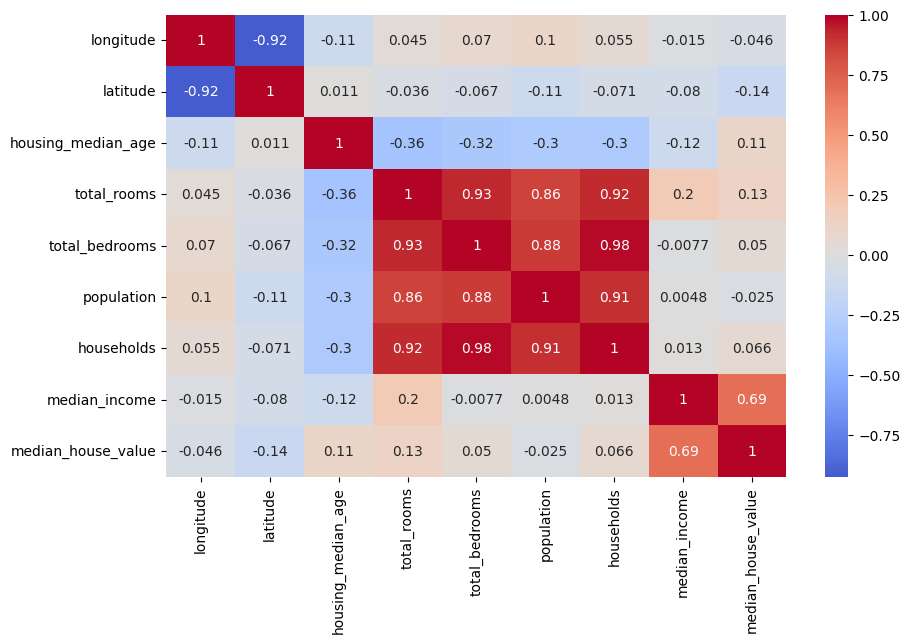

In [ ]:
""" Practicar la diferencia en cmap default con cmap coolwarm: """
# cmap=coolwarm -> permite visualizar mejor los extremos positivos y negativos.
#
numerical_df = df.select_dtypes(include=['float', 'int'])     # Seleccionamos sólo las variables cuantitativas

corr_matrix = numerical_df.corr()
corr_matrix

plt.figure(figsize = (10,6))
# annot=True -> Permite ver los valores de correlación dentro de cada celda
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.show()

9. con las columnas, realiza un grafico ```pairplot``` empleando ```seaborn```  de python.
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```

  **Def:** Un gráfico pairplot es una matriz de diagrammas de dispersión que muestra la relación entre todos los pares posibles de variables en un conjunto de datos.

  * En la diagonal se grafican histogramas (diagramas de densidad) para cada variable individual.

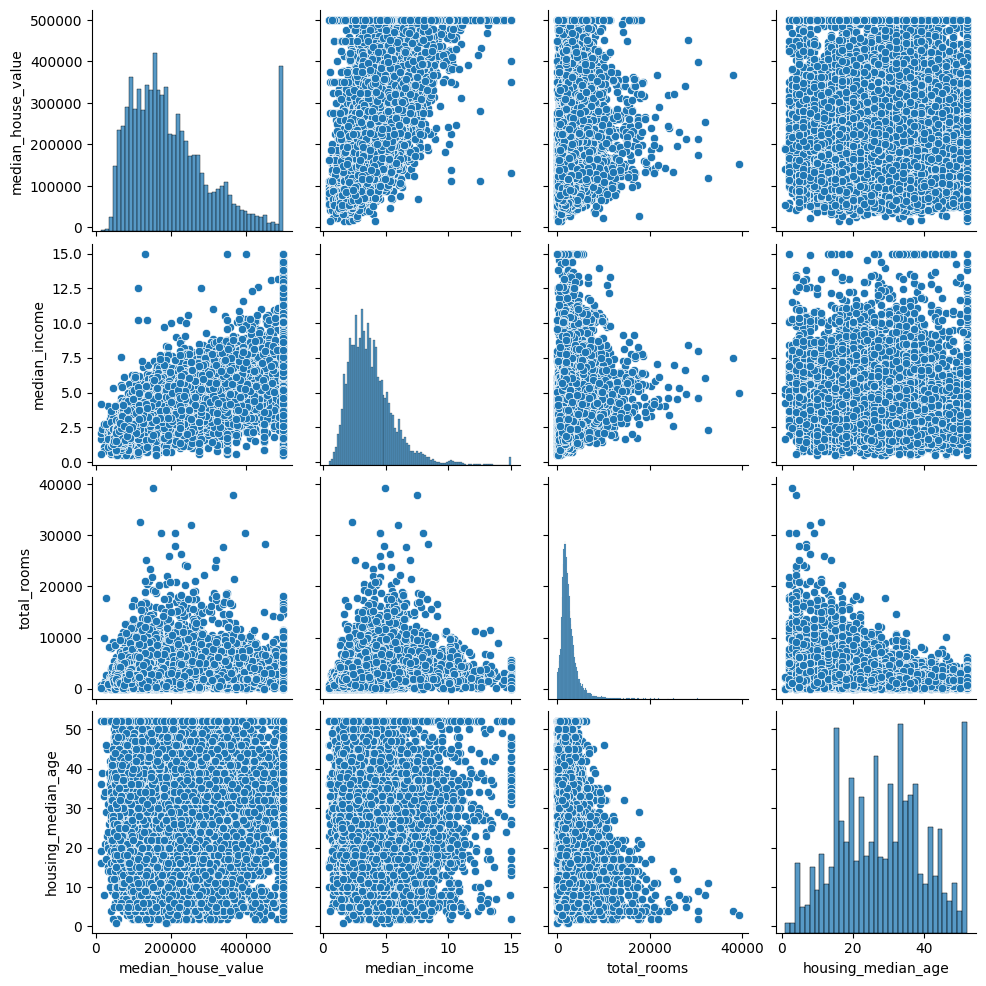

In [ ]:
cols = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
df_reduced = df[cols]
sns.pairplot(df_reduced)

In [ ]:
# sns.pairplot(numerical_df)

10. Realiza un ```scatterplot``` con la libreria ```seaborn``` de python. El color del gráfico puede ser empleado con la columna median_house_value

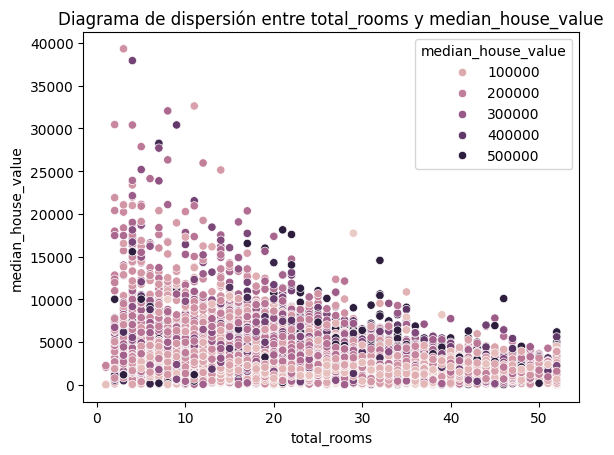

In [ ]:
plt.title('Diagrama de dispersión entre total_rooms y median_house_value')
# hue -> parámetro para establecer color de acuerdo a una variable
sns.scatterplot(df, x="housing_median_age", y="total_rooms", hue="median_house_value")
plt.xlabel('total_rooms')
plt.ylabel('median_house_value')
plt.show()

#2.0 Preparacion del DataFrame

## Evitar el data *Snooping bias*.

En algunos casos se sugiere dividir los datos en entrenamiento y test desde el principio dado que el cerebro puede sobreajustar el dataset y los resultados no significativos se pueden volver significativos. El procedimiento correcto es probar cualquier hipótesis en un conjunto de datos que no se utilizó para generar las hipótesis inicial.


## *Sampling bias*

Si el dataset es lo suficientemente grande, un muestreo aleatorio de la muestra puede ser considerado, sin embargo, si la muestra es pequeña se debe garantizar homogeniedad en el dataset de entrenamiento.


> ***Ejemplo:***
>
> Por ejemplo, la población de EE. UU. está compuesta por un 51,3 % de mujeres y un 48,7 % de hombres, por lo que una encuesta bien realizada en EEUU trata de mantener esta proporción en la muestra: 513 mujeres y 487 hombres.
>
> Esto se llama **muestreo estratificado**(stratified sampling): la población se divide en subgrupos homogéneos llamados estratos(strata), y se muestrea el número correcto de instancias de cada estrato para garantizar que el conjunto de prueba es representativo de la población general. Si usaran muestras puramente aleatorias, habría alrededor del 12% de posibilidades de muestrear un conjunto de prueba sesgado con menos del 49% de mujeres o más del 54% de mujeres. De cualquier manera, los resultados de la encuesta sería
significativamente sesgada.

### Separación del DataFrame en datos de entrenamiento y test

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print('Cantidad total de datos:', len(df))
print('Cantidad de datos de entrenamiento: 80% =', len(train_set))
print('Cantidad de datos de prueba: 20% =', len(test_set))

Cantidad total de datos: 20640
Cantidad de datos de entrenamiento: 80% = 16512
Cantidad de datos de prueba: 20% = 4128


12. División del dataset en grupos.


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

```python
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
df.income_cat.hist()
```

> ```pd.cut()``` se utiliza para discretizar una variable continua, convirtiéndola en una variable categorizada.
>
> * Divide el rango de la variable en intervalos (```bins```).
>
> * Asigna una categoría (```label```) a cada intervalo, siendo un valor numérico o alfanumérico.

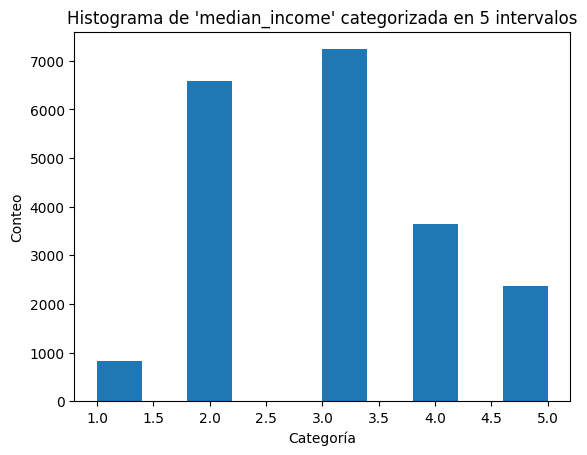

In [ ]:
# 12. Division en grupos -> Conversión de característica numérica a categórica

# Se divide la característica numérica 'median_income' para crear categorías
# por medio de intervalos (5 en este caso)
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

plt.title("Histograma de 'median_income' categorizada en 5 intervalos")
df.income_cat.hist()
# plt.xticks(range(1, 6))
plt.xlabel('Categoría')
plt.ylabel('Conteo')
plt.grid(False)
plt.show()

La forma automatica de realizar la división puede ser la siguiente:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

```

> [Función StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit)
>
>

Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

```python
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)
```

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
# StratifiedShuffleSplit -> Proporciona índices de entramiento/prueba para dividir datos en conjuntos
# Devuelve pliegues aleatorios estratificados conservando el % de muestras para cada clase
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# split(data a estratificar, variable_objetivo)
# La estratificación se realiza en función de las etiquetas de la variable_objetivo
for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]     # Entrenamiento (80%)
  strat_test_set = df.loc[test_index]       # Prueba (20%)

print('Cantidad total de datos:', len(df))
print('Cantidad de datos de entrenamiento: 80% =', len(strat_train_set))
print('Cantidad de datos de prueba: 20% =', len(strat_test_set))

Cantidad total de datos: 20640
Cantidad de datos de entrenamiento: 80% = 16512
Cantidad de datos de prueba: 20% = 4128


1. Veamos la proporción de datos en cada categoría de ````median_income```.

In [ ]:
# Proporción de datos en cada categoría de 'median_income'
df["income_cat"].value_counts()/len(df)

,count
income_cat,
3,0.350581
2,0.318847
4,0.176308
5,0.114438
1,0.039826


2. Ahora veamos la proporción de datos en el dataset de entrenamiento y el de prueba, en cada categoría de ```median_income```

In [ ]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

,count
income_cat,
3,0.350594
2,0.318859
4,0.176296
5,0.114462
1,0.039789


In [ ]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


* Comparando con la proporción de datos de cada categoría de ```median_income``` en el DataFrame completo, notamos que los datos de entrenamiento y de prueba adquieren esta proporciones aproximadamente iguales (sólo difieren a partir de la cuarta cifra decimal).

* La estratificación se hizo correctamente en la extracción de las muestras.

\
3. Ahora comparemos con la función ```train_test_split```.

In [ ]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# Verificamos la proporción de datos en estas nuevas muestras de acuerdo a la
# variable estratificada 'income_cat' (income_median)
train_set["income_cat"].value_counts()/len(train_set)

,count
income_cat,
3,0.348595
2,0.317466
4,0.178537
5,0.115673
1,0.039729


In [ ]:
test_set["income_cat"].value_counts()/len(test_set)

,count
income_cat,
3,0.358527
2,0.324370
4,0.167393
5,0.109496
1,0.040213


* Vemos que para estos nuevos datasets de entrenamiento y de prueba, la proporción de datos para cada categoría de ```income_cat``` tienen una variación significativa comparado respecto al dataset original. La diferencia entre las proporciones se comienza a notar desde la segunda cifra decimal.

**Conclusiones:**

* El método ```train_test_split``` no genera muestras más significativas comparada con el método ```StratifiedShuffleSplit```, a pesar de que el tamaño del dataset original es apreciablemente grande.

* Debido a su naturaleza aleatoria, el método ```train_test_split``` es más eficiente cuando la cantidad de datos es mucho más grande y con menor cantidad de categorías.

Un comparativo general puede ser estructurado de la siguente forma (analiza  los errores):

```python
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
```

In [ ]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts()/len(data)

# Selección aleatoria
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

# Selección estratificada
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]     # Entrenamiento (80%)
  strat_test_set = df.loc[test_index]       # Prueba (20%)

# DataFrame comparativo de proporciones de la variable categorizada
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),   # Selección estratificada
    "Random": income_cat_proportions(test_set),             # Selección aleatoria
}).sort_index()

# Error en el muestreo
compare_props["Rand. %error"] =abs( 100*compare_props["Random"]/compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100*compare_props["Stratified"]/compare_props["Overall"] - 100)

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,0.015195
3,0.350581,0.350533,0.358527,2.266446,0.013820
4,0.176308,0.176357,0.167393,5.056334,0.027480
5,0.114438,0.114341,0.109496,4.318374,0.084674


**Procedimiento:**

1. Leer los data.

2. Para hacer el split analizar si la muestra es significativa para el entrenamiento y test

3. Dejar los data de test ocultos para hacer las pruebas

In [ ]:
df_train = strat_train_set
df_test = strat_test_set

# Matriz de correlación
numerical_df_train = df_train.select_dtypes(include=['float', 'int'])   # Variables numéricas
corr_matrix = numerical_df_train.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


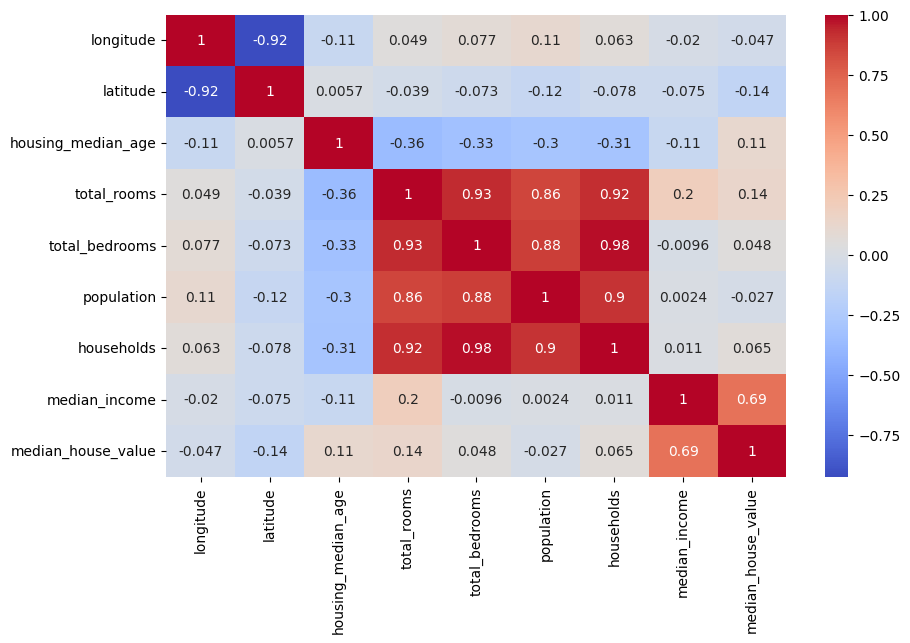

In [ ]:
# Visualización de la matriz de correlación
plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:
```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```


In [ ]:
# Agregar nuevas variables
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]

In [ ]:
numerical_df_train = df_train.select_dtypes(include=['float', 'int'])
corr_matrix = numerical_df_train.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
rooms_per_household,0.146255
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population_per_household,-0.021991
population,-0.026882
longitude,-0.047466


In [ ]:
corr_matrix = numerical_df_train.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
rooms_per_household,0.146255
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population_per_household,-0.021991
population,-0.026882
longitude,-0.047466


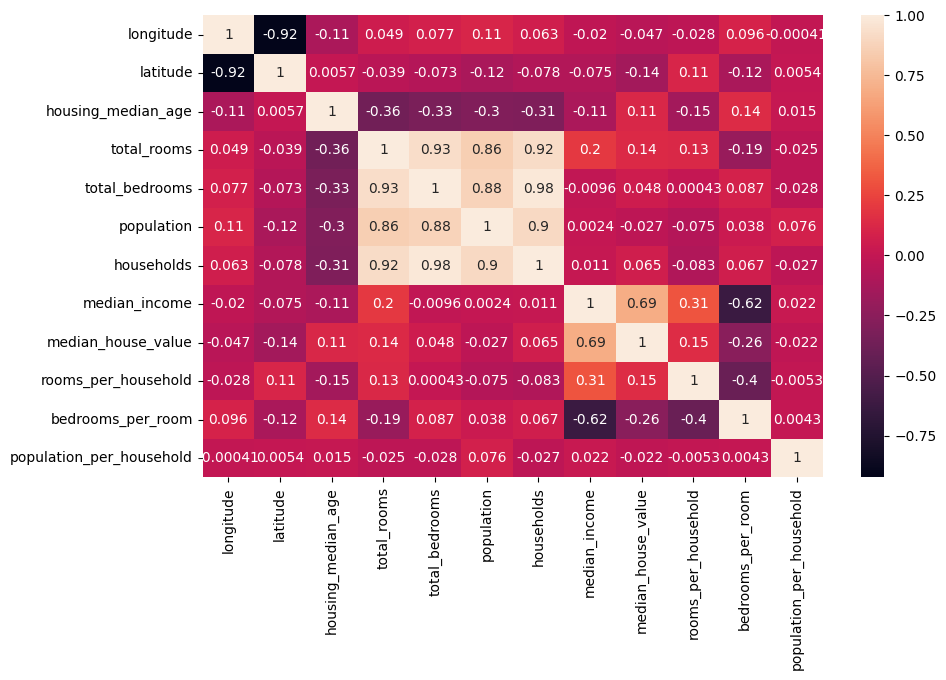

In [ ]:
# Visualización de la matriz de correlación
plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True)
plt.show()

## Limpieza de los datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

```python
df.isnull().sum()

# df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()

q=pd.DataFrame(q)

q.isnull().sum()
```

In [ ]:
""" Limpieza de datos """
# Verificación de datos nulos
df_train.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,158
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
# df_train.dropna(subset=["total_bedrooms"])  # Eliminar los nan
# df_train.drop("total_bedrooms", axis=1)     # Eliminar la columna
median = df_train["total_bedrooms"].median()

# Rellenamos los ceros con la mediana (inplace = False)
q = df_train["total_bedrooms"].fillna(median).copy()  # Columna con los valores cambiados

q = pd.DataFrame(q)
q.isnull().sum()

,0
total_bedrooms,0


## imputer - Manejo de atributos numéricos

Es una forma automática para tratar los datos antes de aplicar algoritmos de Machine Learning (Asegurate de trabajar con las columnas numéricas):


```python
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_
```

14. Compara las siguientes variables:

```python
imp_mean.statistics_
df_train_num.median()
```

Constuye la matriz de características:

```python
X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```


### Clase ```SimpleImputer```

Esta clase sirve para reemplazar los valores faltantes (o NaN) en un DataFrame (o cualquier conjunto de datos) por un estadístico descriptivo a lo largo de cada columna, por ejemplo; la media, la mediana, la moda o un valor que se escoja.

**Atributos:**

* ```statistics_ [shape = n_features]``` : Es el valor de relleno de imputación para cada característica de los datos entrantes.

  Descarta las características cuyas estadísticas descriptivas sean ```np.nan```.

* ```n_features_in_ [int]``` : Número de rasgos observados durante el ajuste.

* ```feature_names_in_```

**Métodos:**

* ```fit(X)``` : Prepara la imputación en X.

* ```transform(X)``` : Impute todos los valores faltantes en X (devuelve array X).

* ```fit_transform(X, **fit_params)``` : Prepara la imputación y luego transforma los datos.

  Devuelve una versión transformada de X en un array.

* ```inverse_transform(X)``` : Convierte los datos de nuevo a la representación original. Invierte la operación de transformación realizada en una matriz.

 Esta operación sólo se puede realizar después de instanciar SimpleImputer con ```add_indicator=True```.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
""" Imputación """

# df_train_num = df_train.drop("ocean_proximity", axis=1)   # Elimina la columna

# Seleccionamos las columnas numéricas
df_train_num = df_train.select_dtypes(include=['float', 'int'])

#imputer = SimpleImputer(strategy="median")

# Preparamos el imputador a través de la media
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(df_train_num)

print('=========== Media para cada columna ===========')

features = imp_mean.feature_names_in_
for i, feature in enumerate(features):
  print(f'{feature}: \t {imp_mean.statistics_[i]}')

=========== Media para cada columna ===========
longitude: 	 -119.57563529554263
latitude: 	 35.639314437984495
housing_median_age: 	 28.653403585271317
total_rooms: 	 2622.539789244186
total_bedrooms: 	 534.9146386205209
population: 	 1419.687378875969
households: 	 497.01180959302326
median_income: 	 3.875884278100775
median_house_value: 	 207005.32237160852
rooms_per_household: 	 5.440405951318148
bedrooms_per_room: 	 0.2128727717669268
population_per_household: 	 3.0964692067893314


In [ ]:
# Comparemos con la mediana de dichas columnas
medians = df_train_num.median().values

for i, feature in enumerate(features):
  print(f'{feature}: \t {medians[i]}')

longitude: 	 -118.51
latitude: 	 34.26
housing_median_age: 	 29.0
total_rooms: 	 2119.0
total_bedrooms: 	 433.0
population: 	 1164.0
households: 	 408.0
median_income: 	 3.54155
median_house_value: 	 179500.0
rooms_per_household: 	 5.232341640765675
bedrooms_per_room: 	 0.20302704317273024
population_per_household: 	 2.8176610834960165


In [ ]:
# Tranformamos las características aplicando la imputación
X = imp_mean.transform(df_train_num)    # [array]

# Convertimos a DataFrame
# housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
housing_tr = pd.DataFrame(X, columns=features)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,5.485836,0.205784,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,6.927083,0.160714,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,5.393333,0.191595,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,3.886128,0.276505,1.859213
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,6.658342,0.184696,2.023976
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,5.571932,0.179977,3.363188
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,4.110465,0.234795,2.662791
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,6.297405,0.183835,2.411178


## Manejo de texto y atributos categóricos

15.  ¿Qué realizan las siguientes líneas de código?

```python
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat = df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)

df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
```


### Clase ```OneHotEncoder```

Codifica las características categóricas como una matriz numérica de un solo valor.

La entrada de este transformador debe ser una matriz de enteros o cadenas, que denote los valores que toman las características categóricas (discretas).

Crea una columna binaria para cada categoría de cada característica y devuelve una matriz dispersa o una matriz densa (dependiendo del parámetro `sparse_output`). Por defecto, el codificador deriva las categorías basándose en los valores únicos de cada característica. También puede especificar las categorías manualmente.

> **Matriz dispersa:** (`sparse_output=True`) es un tipo de estructura de datos que almacena solo los elementos no nulos, lo cual es eficiente cuando la mayoría de los elementos son ceros.
>
> *Nota: Si se desea devolver una matriz dispersa, analice si requiere imputar los valores nulos para sus características.*

> **Matriz densa:** Es una matriz estándar en la que la mayoría de los elementos son valores diferentes de cero. Almacena y representa explícitamente cada uno de los elementos, ya sea cero o un valor distinto de cero.


**Atributos:**

* `categories_` : Las categorías de cada característica determinadas durante el ajuste (en orden de las características en X y correspondientes con la salida de la transformación).

* `drop_idx_` : `drop_idx_[i]` is the index in `categories_[i]` of the category to be dropped for each feature.

* `n_features_in_`, `feature_names_in_`

**Métodos:**

* `fit(X)` : Prepara la codificación a X. Retorna el codificador instalado.

* `transform(X)` : Transforme X usando codificación one-hot.

* `fit_transform(X)` : Ajusta los datos y luego los transforma. Devuelve una versión transformada de X (matriz dispersa).

* `inverse_transform(X)` : Convierta los datos nuevamente a la representación original.

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Manejo texto y atributos categóricos

# Variable categórica de texto
df_train["ocean_proximity"].unique()

array(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [ ]:
housing_cat = df_train[["ocean_proximity"]]

In [ ]:
housing_cat

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


In [ ]:
cat_encoder = OneHotEncoder()   # Instancia Encoder

# Codifica y crea la matriz dispersa
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

print('Forma de la matriz dispersa: datos=%d, nuevas_características=%d' %np.shape(housing_cat_1hot))
print(housing_cat_1hot)

Forma de la matriz dispersa: datos=16512, nuevas_características=5
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>
  Coords	Values
  (0, 1)	1.0
  (1, 4)	1.0
  (2, 1)	1.0
  (3, 4)	1.0
  (4, 0)	1.0
  (5, 3)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 4)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 3)	1.0
  (19, 0)	1.0
  (20, 1)	1.0
  (21, 3)	1.0
  (22, 1)	1.0
  (23, 0)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 0)	1.0
  (16489, 4)	1.0
  (16490, 4)	1.0
  (16491, 1)	1.0
  (16492, 1)	1.0
  (16493, 0)	1.0
  (16494, 0)	1.0
  (16495, 0)	1.0
  (16496, 1)	1.0
  (16497, 0)	1.0
  (16498, 4)	1.0
  (16499, 0)	1.0
  (16500, 0)	1.0
  (16501, 1)	1.0
  (16502, 1)	1.0
  (16503, 1)	1.0
  (16504, 1)	1.0
  (16505, 0)	1.0
  (16506, 0)	1.0
  (16507, 0)	1.0
  (16508, 1)	1.0
  (16509, 0)	1.0
  (16510, 0)	1.0
  (16511, 1)	1.0


In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
df_cat_1hot = pd.DataFrame(housing_cat_1hot.toarray(), columns=cat_encoder.categories_[0])
df_cat_1hot

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
16507,1.0,0.0,0.0,0.0,0.0
16508,0.0,1.0,0.0,0.0,0.0
16509,1.0,0.0,0.0,0.0,0.0
16510,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Finalmente unimos las nuevas características al DataFrame imputado
housing_tr_ = housing_tr.join(df_cat_1hot)
housing_tr_.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

## Escalamiento de variables

16. Las variables pueden ser escaladas como sigue:

```python
cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)

housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)
```

In [ ]:
# Escalamiento de variables

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]

# Seleccionamos las columnas anteriores
housing_scale = housing_tr_[cols]

### Clase `MinMaxScaler`

Este estimador escala y traduce cada característica individualmente de forma que se encuentre en el rango dado en el conjunto de entrenamiento, por ejemplo, entre cero y uno.

> Utiliza la transformación dada por:
>
> ```python
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
> ```
>
> donde min, max = rango_características. Por defecto son `min, max = 0,1`

**Nota:** MinMaxScaler NO reduce el efecto de los valores atípicos, sino que los reduce linealmente a un rango fijo, en el que el punto de datos más grande corresponde al valor máximo y el más pequeño al valor mínimo.

**Atributos:**

* `scale_` : Escalado relativo de los datos por característica. Equivale a `(max - min)/(X.max(axis=0) - X.min(axis=0))`

* `min_` : Ajuste por función para mínimo. Equivalente a `min - X.min(axis=0)*self.scale_`

* `data_min_`, `data_max_` : Mínimo y máximo por característica visto en los datos

**Métodos:**

* `fit(X)` : Calcula el mínimo y el máximo que se utilizarán para el escalado posterior (preparación).

* `transform(X)` : Escala las características de X según `feature_range`.

* `fit_transform(X)`

* `inverse_transform(X)`



In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaling = scaler.fit(housing_scale)   # Objeto escalador

In [ ]:
X = scaler.transform(housing_scale)   # Transformación
X

array([[0.28784861, 0.63549416, 0.54901961, ..., 0.        , 0.        ,
        0.        ],
       [0.70916335, 0.05844846, 0.11764706, ..., 0.        , 0.        ,
        1.        ],
       [0.52888446, 0.30074389, 0.84313725, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.1623506 , 0.62699256, 0.92156863, ..., 0.        , 0.        ,
        0.        ],
       [0.16434263, 0.61317747, 0.25490196, ..., 0.        , 0.        ,
        0.        ],
       [0.22011952, 0.78958555, 0.50980392, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
housing_prepared = pd.DataFrame(X, columns=housing_scale.columns)
housing_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426,0.0,1.0,0.0,0.0,0.0
1,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574,0.0,0.0,0.0,0.0,1.0
2,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798,0.0,1.0,0.0,0.0,0.0
3,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067,0.0,0.0,0.0,0.0,1.0
4,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.725100,0.052072,0.254902,0.169380,0.197970,0.056700,0.186520,0.316554,1.0,0.0,0.0,0.0,0.0
16508,0.291833,0.634431,0.274510,0.200819,0.228737,0.133580,0.264376,0.159584,0.0,1.0,0.0,0.0,0.0
16509,0.162351,0.626993,0.921569,0.017831,0.026418,0.012753,0.031740,0.184811,1.0,0.0,0.0,0.0,0.0
16510,0.164343,0.613177,0.254902,0.080099,0.093106,0.033773,0.093167,0.254928,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Consideremos las siguientes columnas:

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income"]

housing_prep = housing_prepared[cols]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

housing_labels = df_train["median_house_value"].copy()

# Característica objetivo: median_house_value
model.fit(housing_prep, housing_labels)
housing_predictions = model.predict(housing_prep)

model.score(housing_prep, housing_labels)

0.6343991933140793

**Observación:**

* Una regresión lineal en donde se quiera describir la característica `median_house_value` a partir de una combinación lineal de las características de `cols` devuelve un $R^2 = 0.634$, lo que quiere decir que el modelo explica el $63.4 \%$ de la variabilidad en los valores de la característica `median_house_value` (valor medio de la vivienda) basándose en las características proporcionadas.

* Sin embargo, un score de $0.634$ también implica que el $36.6 \%$ de la variabilidad no está siendo explicada por el modelo, lo que sugiere que hay otros factores importantes que afectan el valor medio de la vivienda y que no están siendo considerados en este análisis.

## Procedimiento general de preparación de los datos

17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis.

  Divide el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

> 1. **Carga del dataset:**  
>
> 2. **Creación de una variable auxiliar para estratificación:** Se crea la columna `income_cat` a partir de la variable `median_income`, dividiéndola en intervalos creando una serie de calses. Se estratifican los datos de acuerdo a estas clases.
>
> 3. **División del DataFrame en entrenamiento y test:**
>
>   - Utilizamos una función de división (como `train_test_split` o `StratifiedShuffleSplit`) aplicando la estratificación basada en la columna `income_cat`.  
>   - Genera dos DataFrames: `housing_train` y `housing_test`.
>
> 4. **Separación de características y variable objetivo:**  
   - Separamos las columnas que contienen las características (features) de la variable objetivo (`median_house_value`).
>
> 5. **Eliminación de la variable auxiliar de estratificación:**  Con la estratificación realizada podemos eliminar la columna `income_cat` de ambos dataframes.
>
> 6. **Identificación de atributos numéricos y categóricos:** Clasificamos las columnas del DataFrame en numéricas y aquellas que son de tipo texto o categóricas.
>
> 7. **Creación del pipeline para atributos numéricos:**  
>  - **Imputación de valores faltantes:** Rellena los datos perdidos utilizando estadísticos descriptivos como la media, mediana, y otros.  
>   - **Escalamiento de variables:** Aplicamos una transformación (por ejemplo, `StandardScaler`) para normalizar los datos.
>
> 8. **Creación del pipeline para atributos categóricos:**  
>   - **Imputación de valores faltantes:** Completa los valores ausentes (por ejemplo, usando la moda).  
>   - **Codificación One-Hot:** Transforma las variables categóricas en un formato numérico binario.
>
> 9. **Unificación de pipelines con ColumnTransformer:**  Combinamos los pipelines de atributos numéricos y categóricos en un solo transformador que se encargue de aplicar las transformaciones a cada grupo de columnas.
>
> 10. **Aplicación del pipeline completo al conjunto de entrenamiento**, y luego se transforma tanto los datos de entrenamiento como los de test para obtener matrices preprocesadas.
>
> 12. **Combinación con la variable objetivo:**  
> - Integramos las características preprocesadas con la variable objetivo para formar los DataFrames finales listos para el análisis:  
>      - `housing_train_final` para el conjunto de entrenamiento.  
>      - `housing_test_final` para el conjunto de test.

18. ¿Qué puede concluir respecto al modelo empleado?

19. ¿El modelo de regresión lineal es valido para lo construido?

> Un modelo de regresión lineal en general es sencillo, eficaz y eficiente, además de que no exige un costo computacional alto. Es ideal que antes de aplicar este modelo se pueda estudiar el nivel de correlación entre las características para que el modelo no introduzca ni propague errores debido a una dependencia lineal entre variables. En general el modelo es muy adecuado para realizar estudios preliminares con los datos y encontrar tendencias y predicciones para la variable objetivo.


20. ¿Qué información nos da el score?

> El score, en un modelo de regresión, es la métrica correspondiente al coeficiente de determinación $R^2$, el cual nos indica el rendimiento del modelo en función de cómo se ajusta a los datos y su capacidad de predicción. Con este podemos determinar si el modelo es capaz de generalizar bien a nuevos datos o si necesita ajustes o mejoras.
>
> Un score cercano a 1 indica un buen ajuste, mientras que valores cercanos a 0 sugieren un desempeño deficiente.


21. ¿Puede ser ajustado a otro modelo?

> Sí, es posible ajustar el proceso y utilizar los datos preprocesados para entrenar otro modelo. Como el  pipeline de limpieza, escalado y transformación de variables es independiente del modelo que se decida utilizar. Precisamente el pipeline permite optimizar el proceso de modelado y mejorar la capacidad predictiva.

22. ¿Cómo puede automatizar todo el proceso empleando pipelines?

Implementando una estructura con pipelines se integra el preprocesamienton de las características categóricas y numéricas, la imputación, el escalador de los datos y el entrenamiento. Esto permite una automatización del modelo de aprendizaje, mejora la documentación y facilita posibles ajustes.

\

### Clase `Pipeline`

Es un método para automatizar el proceso de preparación de los datos.

`Pipeline` le permite aplicar secuencialmente una lista de transformadores para preprocesar los datos y, si lo desea, concluir la secuencia con un predictor final para el modelado predictivo.

### Clase `ColumnTransformer`

Este estimador permite transformar diferentes columnas o subconjuntos de columnas de la entrada por separado, y las características generadas por cada transformador se concatenarán para formar un único espacio de características.

**Nota:** Esto es útil para datos heterogéneos o en columnas, para combinar varios mecanismos de extracción de características o transformaciones en un solo transformador.


**Parámetros:**

* `transformers (tuples)` : Lista de tuplas `(nombre, transformador, columnas)` que especifican los objetos transformadores que se aplicarán a los subconjuntos de datos.

### Ejemplo con Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
""" sklearn pipeline example """

# Ejemplo de DataFrame
data = {
    'age': [25, np.nan, 30, 45, np.nan],
    'income': [50000, 60000, np.nan, 80000, 120000],
    'gender': ['male', 'female', 'female', np.nan, 'male'],
    'city': ['New York', 'Los Angeles', 'New York', 'Chicago', 'Chicago']
}
# Como la mayoría de datos son no nulos, utilizamos una matriz densa en la transformación
df = pd.DataFrame(data)

# Identificar las columnas para aplicar cada transformación
numeric_features = ['age', 'income']
categorical_features = ['gender', 'city']

# Definir las transformaciones para cada tipo de columna
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    # handle_unknown: Especifica la forma en que se manejan las categorías desconocidas durante la transformación.

# Crear un ColumnTransformer que aplique las transformaciones a las columnas apropiadas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Crear el pipeline con el preprocesador
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit and transform the data
cleaned_data = pipeline.fit_transform(df)


# Obtener los nombres de las características de cada transformador
cat_columns = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_columns = numeric_features + list(cat_columns)

# Convierta el resultado de nuevo en un DataFrame para facilitar su visualización
cleaned_df = pd.DataFrame(cleaned_data, columns=all_columns)

cleaned_df

,age,income,gender_female,gender_male,gender_nan,city_Chicago,city_Los Angeles,city_New York
0,25.000000,50000.0,0.0,1.0,0.0,0.0,0.0,1.0
1,33.333333,60000.0,1.0,0.0,0.0,0.0,1.0,0.0
2,30.000000,77500.0,1.0,0.0,0.0,0.0,0.0,1.0
3,45.000000,80000.0,0.0,0.0,1.0,1.0,0.0,0.0
4,33.333333,120000.0,0.0,1.0,0.0,1.0,0.0,0.0
